In [1]:
pip install opencv-python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 13.0 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 15.6 MB/s eta 0:00:00m eta 0:00:010:01:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install matplotlib 


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 17.2 MB/s eta 0:00:00m eta 0:00:010:0101
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.4/300.4 kB 11.9 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 9.4 MB/s eta 0:00:000m eta 0:00:010:01:01
  Using cached kiwisolver-1.4.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.4 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 9.9 MB/s eta 0:00:000m eta 0:00:010:01:01
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
Note: you may need to restart the kernel to use updated packages.


### ❖ pixel-wise matching method
Build a function to calculate the disparity map of two input stereo images (left image (L) and right image (R)) using
**pixel-wise matching method**. The calculation steps in this method can be described through the following steps:
1. Read the left (left) and right (right) images as grayscale images and convert them to np.float32.
2. Initialize two variables height, width with values ​ equal to the height and width of the left image.
3. Initialize a zero-zero matrix (depth) with shape equal to (height, width).
4. For each pixel at position (h, w) (browsing from left to right, top to bottom) perform the following steps:
a) Calculate the cost (L1 or L2) between the pairs of pixels left[h, w] and right[h, w − d] (where d ∈
[0, disparity_range]) (In this problem, disparity_range = 16) . If (w − d) < 0, then assign the value
cost = max _cost (max _cost = 255 if using L1 or max _cost = 255 2 if using L2).
b) With the list of calculated costs, choose the d (d optimal ) value where the cost is the smallest.
c) Assign depth[h, w] = d optimal × scale. (In this problem, scale = 16).


### ❖ Step 1: Type conversion
```img -> gray -> astype (np.float32)```

```
1. read left and right image 
2. convert image to gray
3. type conversion to np.float32
```


<class 'numpy.ndarray'>
(288, 384)
float32


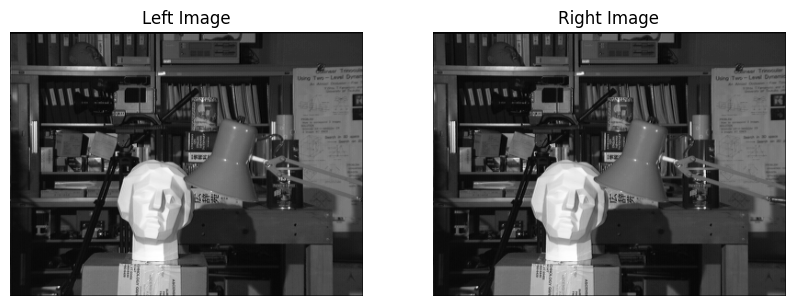

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def type_conversion(path_img):
    image = cv2.imread(path_img)
    # print(image.dtype)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # or 
    # image = cv2.imread(path_img, cv2.IMREAD_GRAYSCALE).astype(np.float32)

    image = image.astype(np.float32) 
    # print(image.dtype)
    return image

left_img_path = 'left.png'  
right_img_path = 'right.png'  

left_image = type_conversion(left_img_path)
right_image = type_conversion(right_img_path)

print(type(left_image))
print(left_image.shape)
print(left_image.dtype)  

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(left_image, cmap='gray')
plt.title('Left Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(right_image, cmap='gray')
plt.title('Right Image')
plt.axis('off')

plt.show()

In [90]:

# image = cv2.imread("left.png") 
# print(type(image))
# print(image.dtype)  

# image = image.astype(np.float32)
# print(type(image))
# print(image.dtype)  


<class 'numpy.ndarray'>
uint8
<class 'numpy.ndarray'>
float32


### ❖ Step 2 Create a zeros matrix

```ZerosMatrix.shape = img.shape```

In [6]:
import numpy as np
def cre_zero_matrix(image):
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # matrix = np.zeros(image.shape)
    
    height, width = image.shape[:2]
    matrix = np.zeros((height, width), np.uint8)
     
    return matrix 


In [7]:
img = cv2.imread("left.png")
matrix = cre_zero_matrix(img)
print(img.shape)        #(288, 384, 3)
print(matrix.shape)     #(288, 384)
# print(matrix)  

(288, 384, 3)
(288, 384)


### ❖ Step 3: Depth Calculation



Thiết kế một hàm có tên gọi **pixel_wise_matching()** với tham số đầu vào là:

– **left_img**: đường dẫn đến ảnh chụp bên trái.

– **right_img**: đường dẫn đến ảnh chụp bên phải.

– **disparity_range**: độ dài tối đa của vùng tìm kiếm giá trị disparity tại mỗi pixel. Mặc định sẽ có giá trị là 16.

– **compute_type**: tên phương pháp tính khoảng cách giữa pixel người dùng muốn sử dụng, giá trị có thể là ’l1’ hoặc ’l2’. Mặc định sẽ được gán là ’l1’.

– **save_result**: giá trị boolean đại diện cho việc có lưu disparity map hay không? Mặc định sẽ có giá trị là True.

Cuối cùng, kết quả trả về của hàm sẽ là một **numpy.ndarray** đại diện cho disparity map tính được.

In [11]:
def L1_distance(x, y ): # SAD (Sum of Absolute Differences) 
    return abs(x - y )

def L2_distance(x, y): ## SSD (Sum of Squared Differences) 
    return (x - y) ** 2 

1.3311271667480469


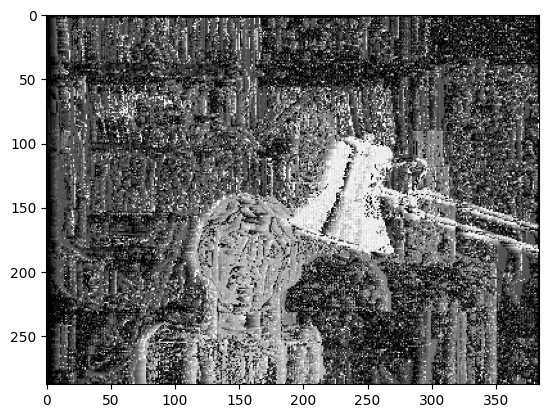

In [12]:

import cv2
import matplotlib.pyplot as plt 
import numpy as np 
import time 

start = time.time()

disparity_range = 16

def L1_distance(x, y ): # SAD (Sum of Absolute Differences) 
    return abs(x - y )

def L2_distance(x, y): ## SSD (Sum of Squared Differences) 
    return (x - y) ** 2 

def pixel_wise_mathching(left_img, right_img, disparity_range, compute_type, save_result):
    
    # TODO: Step 1: Type conversion
    left_img = cv2.imread(left_img, cv2.IMREAD_GRAYSCALE).astype(np.float32)
    right_img  = cv2.imread(right_img, cv2.IMREAD_GRAYSCALE).astype(np.float32)
    
    # TODO: Step 2: Create Zero Matrix
    height, width = left_img.shape[:2]
    depth_matrix = np.zeros((height, width), np.uint8)
    
    # TODO: Step 3: Depth Calculation 
    # max_value = 255
    scale = 255/disparity_range
    for h in range(height):
        for w in range(width):
            
            cost_list = []
            
            for d in range(disparity_range):
                if (w - d) < 0 : 
                    cost_calc = 255 if compute_type == "L1" else 255 ** 2
                else: 
                    if compute_type == "L1":
                        cost_calc = L1_distance(left_img[h, w], right_img[h, w - d ])
                    elif compute_type == "L2":
                        cost_calc = L2_distance(left_img[h, w], right_img[h, w - d ])
                    else: 
                        print("Error choose compute type. Choose again 'L1' or 'L2' ")

                    cost_list.append(cost_calc)
                    
    # TODO: Step 4: Choose disparity optimal
            d_optimal = np.argmin(cost_list)
    
    # TODO: Step 5: Calculate depth matrix        
            depth_matrix[h, w] = d_optimal * scale

    if save_result == True:
        cv2.imwrite('disparity_map.png', depth_matrix)
    
    return depth_matrix    
    
left_img = "left.png"
right_img = "right.png"
compute_type = "L1"
save_result = True

result = pixel_wise_mathching(left_img, right_img,  disparity_range,    compute_type,   save_result)    

plt.imshow(result, "gray")
end = time.time()
print(end - start)

0.03486919403076172


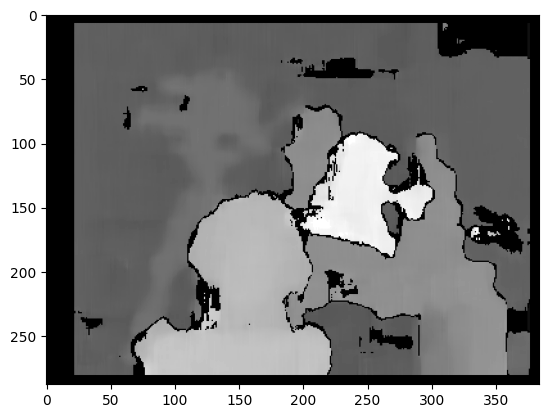

In [38]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt
import time 

start = time.time()

left_img = "left.png"
right_img = "right.png"

disparity_range = 16

left = cv2.imread(left_img , cv2.IMREAD_GRAYSCALE)
right = cv2.imread(right_img, cv2.IMREAD_GRAYSCALE)

stereo = cv2.StereoBM_create(numDisparities = disparity_range, blockSize = 15)

disparity = stereo.compute(left, right)
plt.imshow(disparity,"gray")

end = time.time()
print("Time_processing", end- start, "s")

### Try calculate disparity with noise image 

two image with increased brightness and decreased brightness


In [2]:
import cv2

def adjust_brightness(image, brightness_factor):
    # Adjust the brightness of the image by multiplying the pixel values by the luminance factor
    # orginal = 1,    incre > 1 , decre < 1
    adjusted_image = cv2.convertScaleAbs(image, alpha=brightness_factor, beta=0)
    return adjusted_image

image_path = "right.png"   
image = cv2.imread(image_path)

# decreased brightness 50% (factor 0.5)
decreased_brightness = adjust_brightness(image, 0.5)

# increased brightness 150% (factor 1.5)
increased_brightness = adjust_brightness(image, 1.5)

cv2.imshow("Original Image", image)
cv2.imshow("Decreased Brightness", decreased_brightness)
cv2.imshow("Increased Brightness", increased_brightness)
cv2.imshow("Original Image", image)

cv2.imwrite("decreased_brightness_right_img.jpg", decreased_brightness)
cv2.imwrite("increased_brightness_right_img.jpg", increased_brightness)
cv2.waitKey(0)
cv2.destroyAllWindows()

Time_processing =  0.121612548828125 s


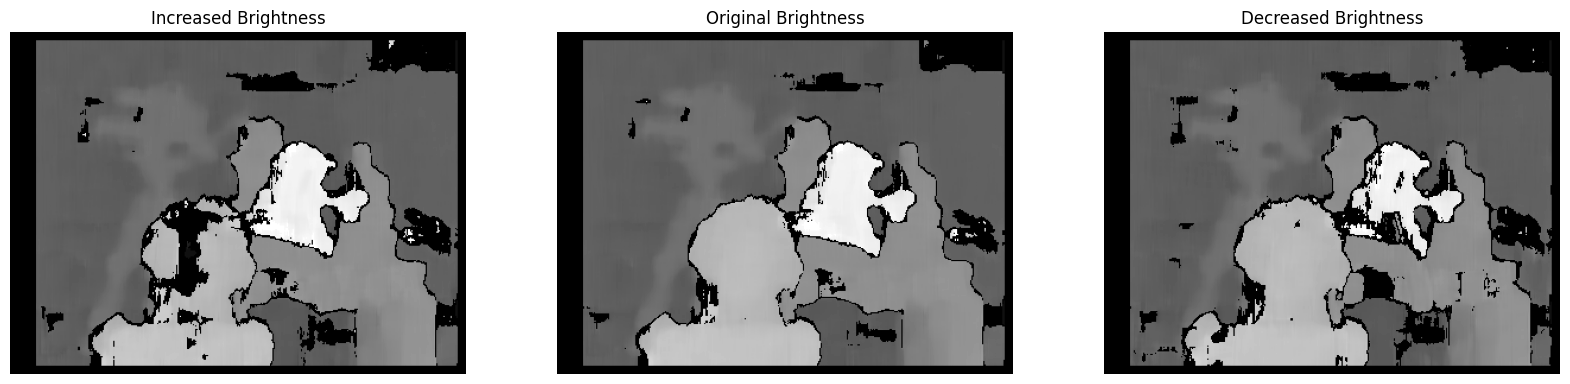

In [9]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt
import time 

start = time.time()

left_img = "left.png"
right_img = "right.png"
right_img_1 = "increased_brightness_right_img.jpg"
right_img_2 = "decreased_brightness_right_img.jpg"

disparity_range = 16

left = cv2.imread(left_img , cv2.IMREAD_GRAYSCALE)
right = cv2.imread(right_img, cv2.IMREAD_GRAYSCALE)
right_1 = cv2.imread(right_img_1, cv2.IMREAD_GRAYSCALE)
right_2 = cv2.imread(right_img_2, cv2.IMREAD_GRAYSCALE)

stereo = cv2.StereoBM_create(numDisparities = disparity_range, blockSize = 15)

disparity = stereo.compute(left, right)
disparity_1 = stereo.compute(left, right_1)
disparity_2 = stereo.compute(left, right_2)

plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(disparity_1, cmap='gray')
plt.title('Increased Brightness')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(disparity, cmap='gray')
plt.title('Original Brightness')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(disparity_2, cmap='gray')
plt.title('Decreased Brightness')
plt.axis('off')
end = time.time()
print("Time_processing = ", end- start, "s")


Time_processing =  0.08286714553833008 s


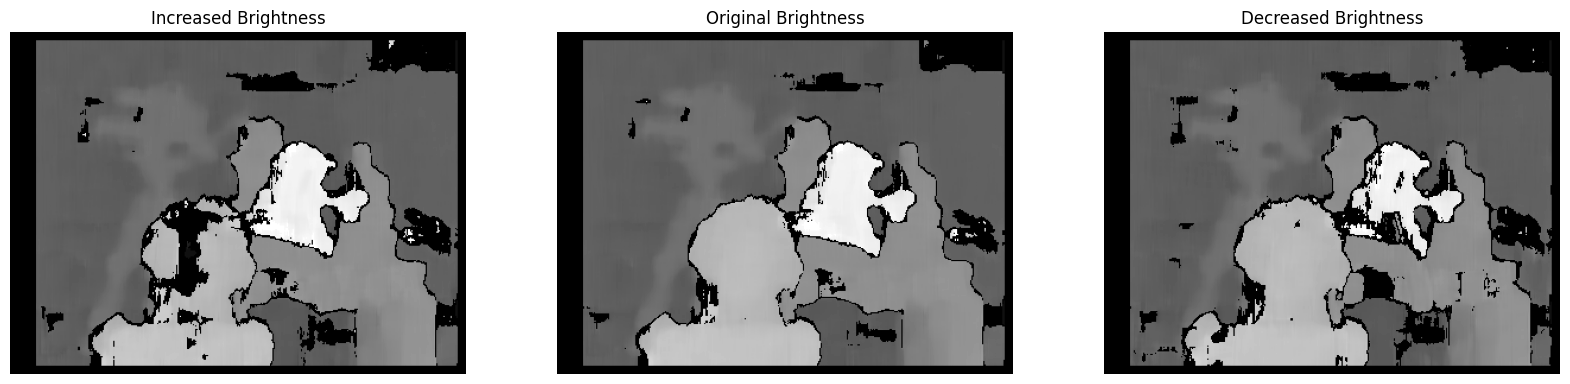

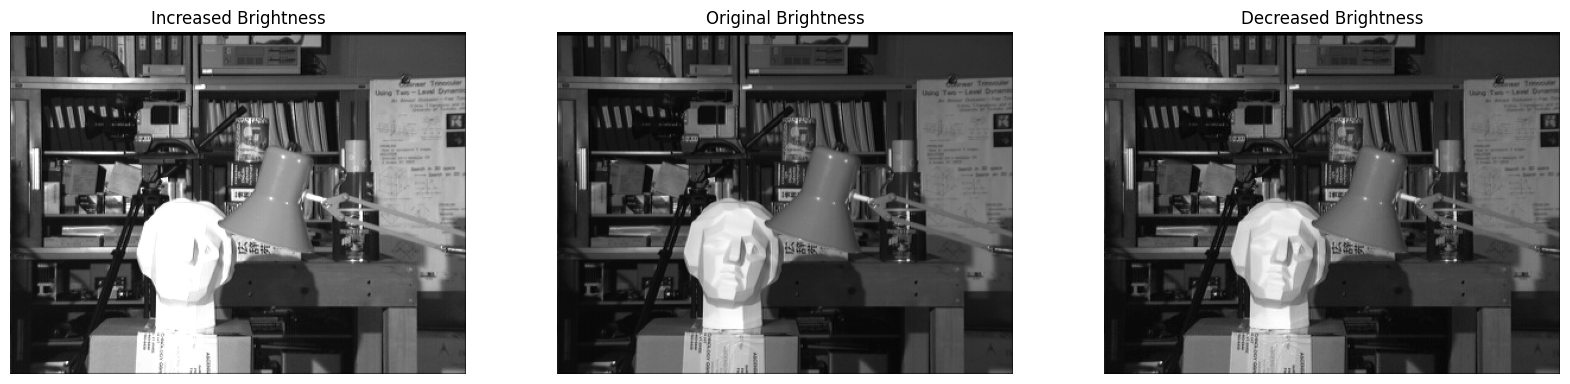

In [28]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt
import time 

start = time.time()

left_img = "left.png"
right_img = "right.png"
right_img_1 = "increased_brightness_right_img.jpg"
right_img_2 = "decreased_brightness_right_img.jpg"

disparity_range = 16

left = cv2.imread(left_img , cv2.IMREAD_GRAYSCALE)
right = cv2.imread(right_img, cv2.IMREAD_GRAYSCALE)
right_1 = cv2.imread(right_img_1, cv2.IMREAD_GRAYSCALE)
right_2 = cv2.imread(right_img_2, cv2.IMREAD_GRAYSCALE)

stereo = cv2.StereoBM_create(numDisparities = disparity_range, blockSize = 15)

disparity = stereo.compute(left, right)
disparity_1 = stereo.compute(left, right_1)
disparity_2 = stereo.compute(left, right_2)

plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(disparity_1, cmap='gray')
plt.title('Increased Brightness')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(disparity, cmap='gray')
plt.title('Original Brightness')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(disparity_2, cmap='gray')
plt.title('Decreased Brightness')
plt.axis('off')

# plt.subplot(3, 3, 2)
# plt.imshow(left, cmap='gray')
# plt.title('Left Image')
# plt.axis('off')

# !-------------------------------------------
plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 1)
plt.imshow(right_1, cmap='gray')
plt.title('Increased Brightness')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(right, cmap='gray')
plt.title('Original Brightness')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(right_2, cmap='gray')
plt.title('Decreased Brightness')
plt.axis('off')

# plt.subplot(3, 3, 2)
# plt.imshow(left, cmap='gray')
# plt.title('Left Image')
# plt.axis('off')

end = time.time()
print("Time_processing = ", end - start, "s")


Time_processing =  0.07953000068664551 s


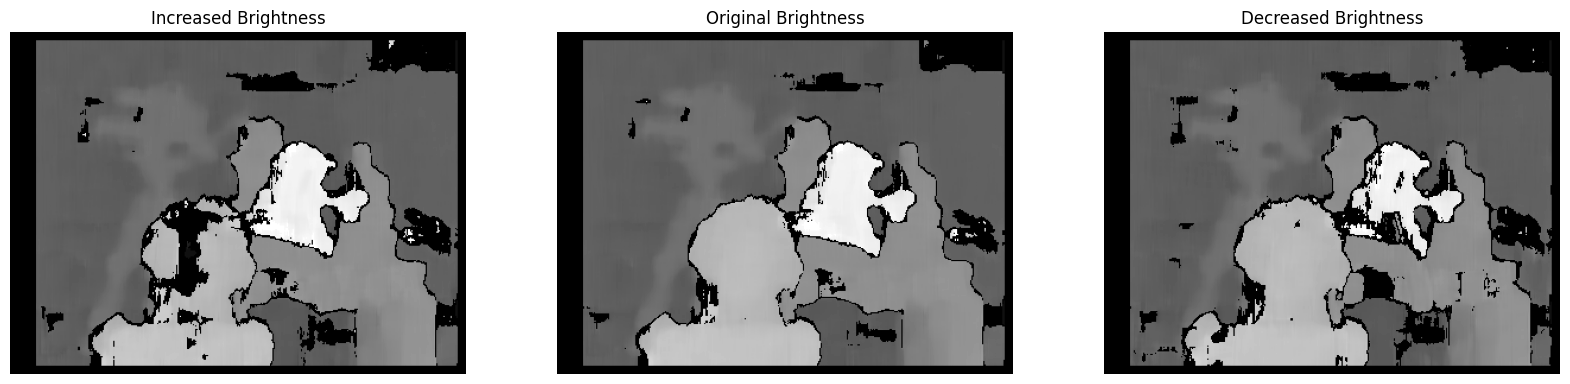

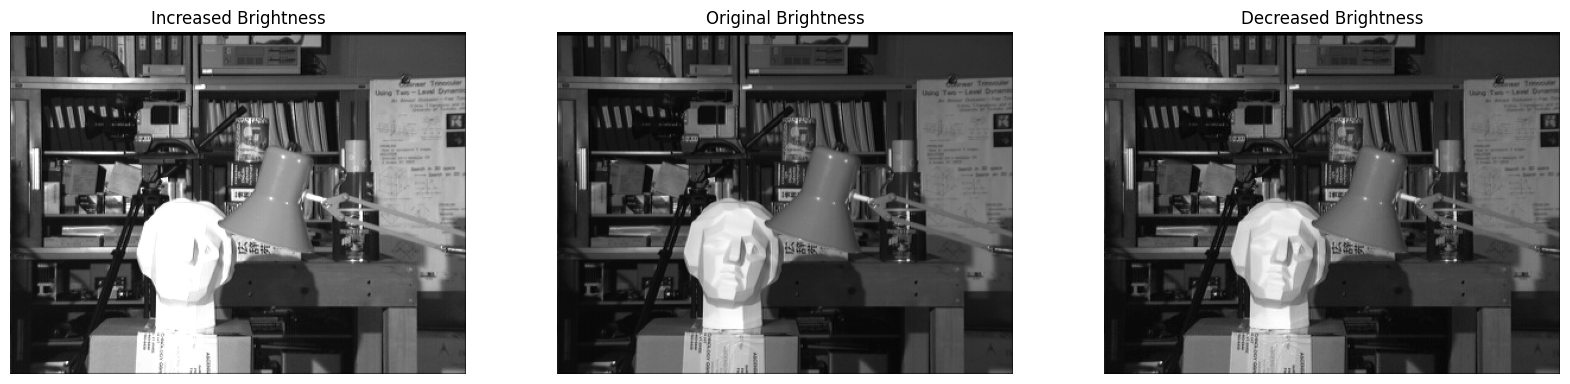

In [22]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt
import time 

start = time.time()

left_img = "left.png"
right_img = "right.png"
increased_brightness_right_img = "increased_brightness_right_img.jpg"
decreased_brightness_right_img = "decreased_brightness_right_img.jpg"

disparity_range = 16

left = cv2.imread(left_img , cv2.IMREAD_GRAYSCALE)
right = cv2.imread(right_img, cv2.IMREAD_GRAYSCALE)
right_1 = cv2.imread(increased_brightness_right_img, cv2.IMREAD_GRAYSCALE)
right_2 = cv2.imread(decreased_brightness_right_img, cv2.IMREAD_GRAYSCALE)

stereo = cv2.StereoBM_create(numDisparities=disparity_range, blockSize=15)

disparity = stereo.compute(left, right)
disparity_1 = stereo.compute(left, right_1)
disparity_2 = stereo.compute(left, right_2)

plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(disparity_1, cmap='gray')
plt.title('Increased Brightness')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(disparity, cmap='gray')
plt.title('Original Brightness')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(disparity_2, cmap='gray')
plt.title('Decreased Brightness')
plt.axis('off')

# !-------------------------------------------
plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 1)
plt.imshow(right_1, cmap='gray')
plt.title('Increased Brightness')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(right, cmap='gray')
plt.title('Original Brightness')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(right_2, cmap='gray')
plt.title('Decreased Brightness')
plt.axis('off')

end = time.time()
print("Time_processing = ", end - start, "s")


Time_processing =  3.763124704360962 s


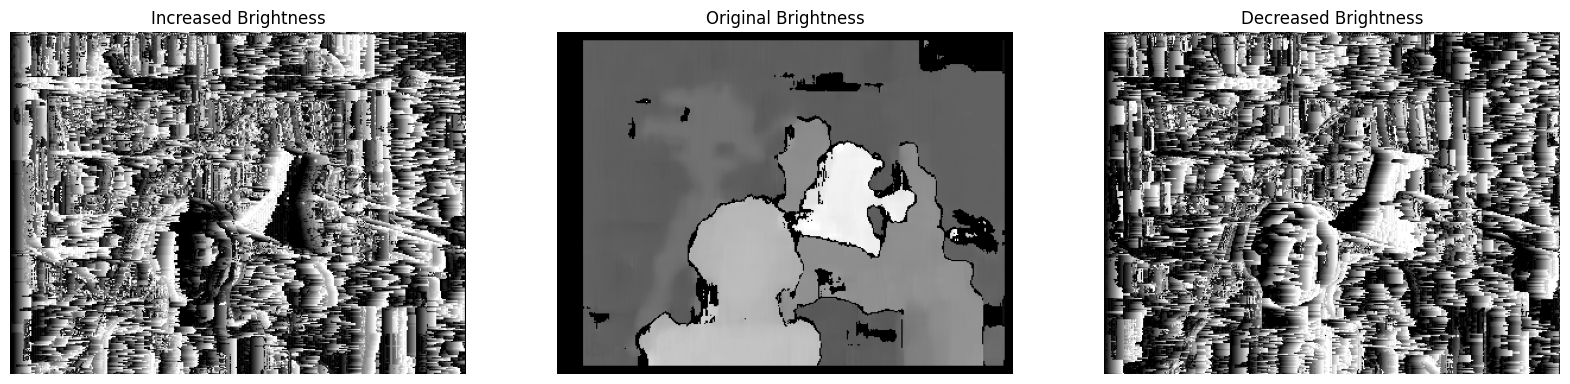

In [13]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np 
import time 

start = time.time()

disparity_range = 16

def L1_distance(x, y ): # SAD (Sum of Absolute Differences) 
    return abs(x - y )

def L2_distance(x, y): ## SSD (Sum of Squared Differences) 
    return (x - y) ** 2 

def pixel_wise_mathching(left_img, right_img, disparity_range, compute_type, save_result):
    
    left_img = cv2.imread(left_img, cv2.IMREAD_GRAYSCALE).astype(np.float32)
    right_img  = cv2.imread(right_img, cv2.IMREAD_GRAYSCALE).astype(np.float32)
    
    height, width = left_img.shape[:2]
    depth_matrix = np.zeros((height, width), np.uint8)
     
    scale = 255/disparity_range
    for h in range(height):
        for w in range(width):
            cost_list = []
            for d in range(disparity_range):
                if (w - d) < 0 : 
                    cost_calc = 255 if compute_type == "L1" else 255 ** 2
                else: 
                    if compute_type == "L1":
                        cost_calc = L1_distance(left_img[h, w], right_img[h, w - d ])
                    elif compute_type == "L2":
                        cost_calc = L2_distance(left_img[h, w], right_img[h, w - d ])
                    else: 
                        print("Error choose compute type. Choose again 'L1' or 'L2' ")

                    cost_list.append(cost_calc)
                    
            d_optimal = np.argmin(cost_list)
            depth_matrix[h, w] = d_optimal * scale
            
    if save_result == True:
        cv2.imwrite('disparity_map.png', depth_matrix)
    
    return depth_matrix    
    
left_img = "left.png"
right_img = "right.png"
right_img_1 = "increased_brightness_right_img.jpg"
right_img_2 = "decreased_brightness_right_img.jpg"

compute_type = "L1"
save_result = False

result = pixel_wise_mathching(left_img, right_img,  disparity_range,    compute_type,   save_result)    

result_1 = pixel_wise_mathching(left_img, right_img_1,  disparity_range,    compute_type,   save_result)    

result_2 = pixel_wise_mathching(left_img, right_img_2,  disparity_range,    compute_type,   save_result)    


plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(result_1, cmap='gray')
plt.title('Increased Brightness')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(disparity, cmap='gray')
plt.title('Original Brightness')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(result_2, cmap='gray')
plt.title('Decreased Brightness')
plt.axis('off')

end = time.time()
print("Time_processing = ", end- start, "s")
